In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [218]:
df =pd.read_parquet('train.parquet')
df.head(5)

,id,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
0,367,edible,bell,scaly,yellow,almond,free,close,broad,black,...,white,white,partial,white,one,pendant,brown,scattered,grasses,Bruises
1,5123,poisonous,convex,smooth,red,foul,free,close,narrow,buff,...,white,pink,partial,white,one,evanescent,white,several,paths,No presenta
2,2864,edible,convex,fibrous,green,null,free,close,broad,pink,...,pink,white,partial,white,one,pendant,brown,several,wood,Bruises
3,4674,poisonous,flat,smooth,white,foul,free,close,broad,pink,...,white,white,partial,white,one,pendant,chocolate,scattered,grasses,Bruises
4,1210,edible,convex,smooth,white,null,free,crowded,broad,black,...,white,white,partial,white,one,evanescent,black,abundant,grasses,No presenta


In [219]:
df = df.set_index('id')
df.head()

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,scattered,grasses,Bruises
5123,poisonous,convex,smooth,red,foul,free,close,narrow,buff,tapering,...,white,pink,partial,white,one,evanescent,white,several,paths,No presenta
2864,edible,convex,fibrous,green,null,free,close,broad,pink,tapering,...,pink,white,partial,white,one,pendant,brown,several,wood,Bruises
4674,poisonous,flat,smooth,white,foul,free,close,broad,pink,tapering,...,white,white,partial,white,one,pendant,chocolate,scattered,grasses,Bruises
1210,edible,convex,smooth,white,null,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,black,abundant,grasses,No presenta


In [220]:
df['cap_shape'].unique()

array(['bell', 'convex', 'flat', 'sunken', 'knobbed', 'c'], dtype=object)

In [221]:
df['class'] = df['class'].map({'edible': 1, 'poisonous': 0})
df['gill_attachment'] = df['gill_attachment'].map({'free': 1, 'attached': 0 })
df['stalk_shape'] = df['stalk_shape'].map({'enlarging': 1, 'tapering': 0})
df['veil_type'] = df['veil_type'].map({'partial': 1})
df['ring_number'] = df['ring_number'].map({'one': 1, 'two': 2, 'null':0})
df['gill_size'] = df['gill_size'].map({'broad': 1, 'narrow': 0})
df['gill_spacing'] = df['gill_spacing'].map({'close': 1, 'crowded': 0})
df['bruises'] = df['bruises'].map({'Bruises': 1, 'No presenta': 0})


df.head()

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,1,bell,scaly,yellow,almond,1,1,1,black,1,...,white,white,1,white,1,pendant,brown,scattered,grasses,1
5123,0,convex,smooth,red,foul,1,1,0,buff,0,...,white,pink,1,white,1,evanescent,white,several,paths,0
2864,1,convex,fibrous,green,null,1,1,1,pink,0,...,pink,white,1,white,1,pendant,brown,several,wood,1
4674,0,flat,smooth,white,foul,1,1,1,pink,0,...,white,white,1,white,1,pendant,chocolate,scattered,grasses,1
1210,1,convex,smooth,white,null,1,0,1,black,0,...,white,white,1,white,1,evanescent,black,abundant,grasses,0


In [222]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'bruises'],
      dtype='object')

In [223]:
print(df['cap_shape'].unique())
print(df['cap_surface'].unique())
print(df['gill_color'].unique())
print(df['cap_color'].unique())
print(df['odor'].unique())
print(df['stalk_root'].unique())
print(df['stalk_surface_below_ring'].unique())
print(df['stalk_surface_above_ring'].unique())
print(df['stalk_color_below_ring'].unique())
print(df['stalk_color_above_ring'].unique())
print(df['veil_color'].unique())
print(df['spore_print_color'].unique())
print(df['ring_type'].unique())
print(df['population'].unique())
print(df['habitat'].unique())

['bell' 'convex' 'flat' 'sunken' 'knobbed' 'c']
['scaly' 'smooth' 'fibrous']
['black' 'buff' 'pink' 'purple' 'chocolate' 'white' 'brown' 'gray' 'red'
 'orange' 'yellow' 'green']
['yellow' 'red' 'green' 'white' 'brown' 'pink' 'cinnamon' 'buff' 'purple']
['almond' 'foul' 'null' 'spicy' 'creosote' 'anise' 'fishy' 'pungent'
 'musty']
['club' '?' 'bulbous' 'equal' 'rooted']
['smooth' 'silky' 'fibrous' 'scaly']
['smooth' 'silky' 'fibrous' 'scaly']
['white' 'pink' 'gray' 'buff' 'brown' 'red' 'orange' 'cinnamon' 'yellow']
['white' 'pink' 'gray' 'red' 'buff' 'brown' 'orange' 'cinnamon' 'yellow']
['white' 'orange' 'brown' 'yellow']
['brown' 'white' 'chocolate' 'black' 'purple' 'buff' 'yellow' 'green'
 'orange']
['pendant' 'evanescent' 'large' 'flaring' 'null']
['scattered' 'several' 'abundant' 'solitary' 'clustered' 'numerous']
['grasses' 'paths' 'wood' 'leaves' 'urban' 'waste' 'meadows']


In [224]:
df = pd.get_dummies(df, columns=['cap_shape', 'cap_surface', 'gill_color', 'cap_color', 'odor', 
                                  'stalk_root', 'stalk_surface_below_ring', 'stalk_surface_above_ring', 
                                  'stalk_color_below_ring', 'stalk_color_above_ring', 'veil_color', 
                                  'spore_print_color', 'ring_type', 'population', 'habitat'])
df

,class,gill_attachment,gill_spacing,gill_size,stalk_shape,veil_type,ring_number,bruises,cap_shape_bell,cap_shape_c,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
id,,,,,,,,,,,,,,,,,,,,,
367,1,1,1,1,1,1,1,1,True,False,...,True,False,False,True,False,False,False,False,False,False
5123,0,1,1,0,0,1,1,0,False,False,...,False,True,False,False,False,False,True,False,False,False
2864,1,1,1,1,0,1,1,1,False,False,...,False,True,False,False,False,False,False,False,False,True
4674,0,1,1,1,0,1,1,1,False,False,...,True,False,False,True,False,False,False,False,False,False
1210,1,1,0,1,0,1,1,0,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1,1,1,1,0,1,1,1,False,False,...,False,True,False,False,False,False,False,False,False,True
5591,0,1,1,0,0,1,1,0,False,False,...,False,True,False,False,False,False,False,False,False,True
2053,1,1,1,1,0,1,1,1,False,False,...,False,False,True,False,False,False,False,False,False,True


In [225]:
df['class'].value_counts()


class
1    2970
0    1633
Name: count, dtype: int64

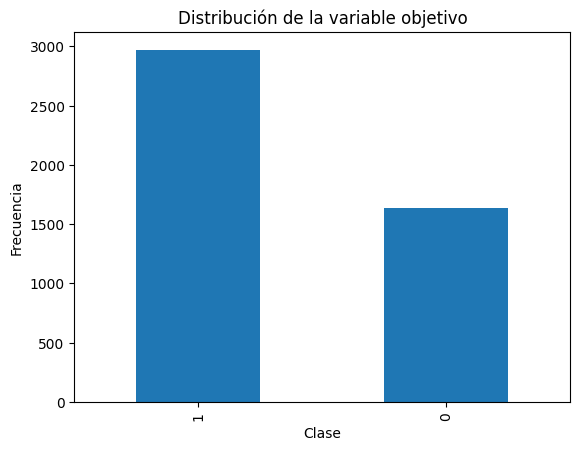

In [226]:
df['class'].value_counts().plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo')
plt.show()


In [227]:
df

,class,gill_attachment,gill_spacing,gill_size,stalk_shape,veil_type,ring_number,bruises,cap_shape_bell,cap_shape_c,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
id,,,,,,,,,,,,,,,,,,,,,
367,1,1,1,1,1,1,1,1,True,False,...,True,False,False,True,False,False,False,False,False,False
5123,0,1,1,0,0,1,1,0,False,False,...,False,True,False,False,False,False,True,False,False,False
2864,1,1,1,1,0,1,1,1,False,False,...,False,True,False,False,False,False,False,False,False,True
4674,0,1,1,1,0,1,1,1,False,False,...,True,False,False,True,False,False,False,False,False,False
1210,1,1,0,1,0,1,1,0,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1,1,1,1,0,1,1,1,False,False,...,False,True,False,False,False,False,False,False,False,True
5591,0,1,1,0,0,1,1,0,False,False,...,False,True,False,False,False,False,False,False,False,True
2053,1,1,1,1,0,1,1,1,False,False,...,False,False,True,False,False,False,False,False,False,True


In [228]:
X = df.drop(columns=['class'])  # Variables independientes
y = df['class']  # Variable objetivo

In [229]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de RandomForest para obtener la importancia de las características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de las características
importances = rf.feature_importances_
features = X.columns

# Ordenar las características por importancia (de mayor a menor)
indices = np.argsort(importances)[::-1]





In [230]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar y entrenar el modelo con las características reducidas
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       594

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



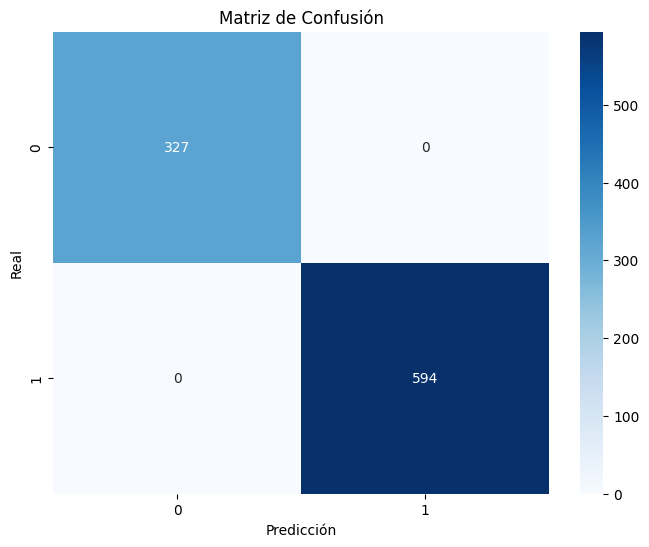

In [231]:
# Hacer predicciones con el modelo entrenado
y = rf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y)
classification_rep = classification_report(y_test, y)
conf_matrix = confusion_matrix(y_test, y)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [232]:
from sklearn.metrics import f1_score

# Calcular el F1-Score
f1 = f1_score(y_test, y, average='weighted')  # 'weighted' toma en cuenta el desbalance de clases
print(f"F1-Score (Weighted): {f1}")


F1-Score (Weighted): 1.0


In [233]:
# Suponiendo que tienes el archivo de test llamado "test.csv"
df_test = pd.read_csv('test.csv')

df_test


,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
1,5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
2,3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
3,2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
4,2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2090,Convex,Fibrous,Green,Bruises,NaN,Free,Close,Broad,White,...,Smooth,White,Gray,Partial,White,One,Pendant,Black,Solitary,Wood
1970,2536,Convex,Scaly,Brown,Bruises,NaN,Free,Close,Broad,Pink,...,Smooth,White,Gray,Partial,White,One,Pendant,Brown,Several,Wood
1971,1215,Convex,Scaly,Red,Bruises,NaN,Free,Close,Broad,Brown,...,Smooth,Pink,White,Partial,White,One,Pendant,Brown,Solitary,Wood
1972,1896,Flat,Smooth,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Fibrous,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [234]:
df_test = df_test.set_index('id')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,Tapering,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,Tapering,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,Enlarging,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood


In [235]:
df_test['gill-attachment'] = df_test['gill-attachment'].map({'Free': 1, 'Attached': 0 })
df_test['stalk-shape'] = df_test['stalk-shape'].map({'Enlarging': 1, 'Tapering': 0})
df_test['veil-type'] = df_test['veil-type'].map({'Partial': 1})
df_test['ring-number'] = df_test['ring-number'].map({'One': 1, 'Two': 2, 'Null':0})
df_test['gill-size'] = df_test['gill-size'].map({'Broad': 1, 'Narrow': 0})
df_test['gill-spacing'] = df_test['gill-spacing'].map({'Close': 1, 'Crowded': 0})
df_test['bruises'] = df_test['bruises'].map({'Bruises': 1, 'No Bruises': 0})


df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,0,NaN,1,0,1,Chocolate,0,...,Smooth,White,White,1,White,1.0,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,0,Foul,1,1,0,Buff,0,...,Silky,White,White,1,White,1.0,Evanescent,White,Several,Paths
3569,Flat,Scaly,Red,1,NaN,1,1,1,White,0,...,Smooth,Gray,White,1,White,1.0,Pendant,Brown,Solitary,Wood
2426,Convex,Fibrous,Green,0,Foul,1,1,1,Gray,1,...,Silky,Brown,Buff,1,White,1.0,Large,Chocolate,Solitary,Paths
2749,Convex,Scaly,Green,1,NaN,1,1,1,Purple,0,...,Smooth,Gray,White,1,White,1.0,Pendant,Black,Solitary,Wood


In [236]:
df_test.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [237]:
df_test = pd.get_dummies(df_test, columns=['cap-shape', 'cap-surface', 'gill-color', 'cap-color', 'odor', 
                                           'stalk-root', 'stalk-surface-below-ring', 'stalk-surface-above-ring', 
                                           'stalk-color-below-ring', 'stalk-color-above-ring', 'veil-color', 
                                           'spore-print-color', 'ring-type', 'population', 'habitat'])
df_test


,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,ring-number,cap-shape_Bell,cap-shape_Convex,cap-shape_Flat,...,population_Scattered,population_Several,population_Solitary,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Urban,habitat_Waste,habitat_Wood
id,,,,,,,,,,,,,,,,,,,,,
1483,0,1,0,1,0,1,1.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
5111,0,1,1,0,0,1,1.0,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3569,1,1,1,1,0,1,1.0,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2426,0,1,1,1,1,1,1.0,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2749,1,1,1,1,0,1,1.0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,1,0,1,1.0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2536,1,1,1,1,0,1,1.0,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1215,1,1,1,1,0,1,1.0,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [238]:
df_test.columns = df_test.columns.str.replace('-', '_')


In [239]:
X_pred = df_test.columns

In [240]:
X_pred

Index(['bruises', 'gill_attachment', 'gill_spacing', 'gill_size',
       'stalk_shape', 'veil_type', 'ring_number', 'cap_shape_Bell',
       'cap_shape_Convex', 'cap_shape_Flat',
       ...
       'population_Scattered', 'population_Several', 'population_Solitary',
       'habitat_Grasses', 'habitat_Leaves', 'habitat_Meadows', 'habitat_Paths',
       'habitat_Urban', 'habitat_Waste', 'habitat_Wood'],
      dtype='object', length=106)

In [241]:
X.columns

Index(['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape',
       'veil_type', 'ring_number', 'bruises', 'cap_shape_bell', 'cap_shape_c',
       'cap_shape_convex',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_wood'],
      dtype='object', length=108)

In [244]:
print(type(X))  # Debe ser <class 'pandas.core.frame.DataFrame'>
print(type(X_pred))  # Debe ser <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.base.Index'>


In [245]:
X = pd.DataFrame(X)  # Si X es una Serie o Index
X_pred = pd.DataFrame(X_pred)  # Si X_pred es una Serie o Index



In [246]:
missing_columns = set(X.columns) - set(X_pred.columns)
print("Columnas que faltan en X_pred:", missing_columns)


Columnas que faltan en X_pred: {'gill_color_purple', 'stalk_color_below_ring_buff', 'gill_color_brown', 'stalk_surface_below_ring_silky', 'gill_color_yellow', 'cap_color_pink', 'stalk_surface_below_ring_fibrous', 'stalk_color_below_ring_white', 'stalk_color_above_ring_yellow', 'spore_print_color_black', 'veil_color_white', 'ring_type_flaring', 'stalk_color_below_ring_gray', 'spore_print_color_buff', 'gill_color_gray', 'spore_print_color_orange', 'veil_type', 'stalk_color_below_ring_yellow', 'ring_type_pendant', 'odor_fishy', 'veil_color_yellow', 'spore_print_color_brown', 'gill_color_black', 'gill_color_pink', 'stalk_surface_below_ring_scaly', 'stalk_color_above_ring_gray', 'stalk_color_above_ring_orange', 'cap_surface_fibrous', 'stalk_root_rooted', 'habitat_grasses', 'cap_shape_sunken', 'gill_color_chocolate', 'habitat_meadows', 'cap_color_red', 'cap_surface_smooth', 'cap_color_green', 'cap_shape_convex', 'odor_null', 'gill_color_buff', 'gill_color_white', 'habitat_wood', 'stalk_color

In [242]:
# Reorganizar las columnas de X_pred para que coincidan con el orden de X_train
X_pred = X_pred[X.columns]
X_pred


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [136]:
X

,odor,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,ring_type,spore_print_color,population,habitat,bruises
0,0,1,1,0,1,2,3,3,4,1,3,0,1
1,4,1,0,2,0,0,2,2,0,7,4,3,0
2,6,1,1,7,0,1,3,3,4,1,4,6,1
3,4,1,1,7,0,1,0,0,4,3,3,0,1
4,6,0,1,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,8,1,0,2,0,0,2,3,0,7,4,3,0
5936,7,1,0,0,1,3,3,3,4,1,3,0,1
5937,3,1,0,2,0,0,3,2,0,7,4,1,0
5938,4,1,1,7,1,1,2,2,2,3,4,0,0


In [137]:
predictions_submit = rf.predict(X_pred)
predictions_submit

array([1, 0, 1, ..., 1, 1, 1])

In [138]:
sample = pd.read_csv("sample_solution.csv")

In [139]:
sample.head()

,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,1


In [140]:
submission = pd.DataFrame({"id": sample['id'], "class": predictions_submit})

In [141]:
submission.head()

,id,class
0,1483,1
1,5111,0
2,3569,1
3,2426,0
4,2749,1


In [144]:
def chequeator(df_to_submit,version):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit['id'].all() == sample['id'].all():
                print("You're ready to submit!")
                submission.to_csv(f"submission_{version}.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [145]:
chequeator(submission,1)

You're ready to submit!


NameError: name 'urllib' is not defined